In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mistune.plugins.formatting import insert

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [14]:
!pip install casualml

ERROR: Could not find a version that satisfies the requirement casualml (from versions: none)
ERROR: No matching distribution found for casualml


In [7]:
from causalml.dataset import make_uplift_classification

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [5]:
import numpy as np

In [6]:
np.version.version

'2.0.2'

In [8]:
bd = pd.read_csv('train.csv')

In [10]:
bd

,application_1,cc_1,cc_2,cc_3,cc_4,feature_1,mb_1,cc_5,cc_6,feature_2,...,cc_21,application_15,feature_25,feature_26,cc_22,partner_24,application_16,retro_date,successful_utilization,treatment
0,NaN,1.0,Representatives,123.0,Первичная ДК,1,14.0,147000.0,PLT,0.0,...,NaN,0,1.0,0.0,-1.2,1.0,0,2024-07-04,0,1
1,NaN,1.0,Offline,43.0,Airports,0,1.0,120000.0,PLT,0.0,...,1.0,0,1.0,0.0,-1.2,1.0,0,2024-06-06,0,1
2,0.0,1.0,Web,2.0,seo,0,NaN,15000.0,PLT,0.0,...,NaN,0,NaN,0.0,-1.2,1.0,0,2024-07-21,1,1
3,0.0,1.0,MB,2.0,One Click Offer,0,91.0,260000.0,PLT,0.0,...,1.0,0,NaN,1.0,-1.2,1.0,0,2024-05-23,0,1
4,0.0,1.0,Representatives,123.0,Первичная ДК,1,1.0,130000.0,PLT,0.0,...,NaN,0,1.0,0.0,-1.2,1.0,0,2024-06-28,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297245,NaN,1.0,Representatives,123.0,Первичная ДК,1,34.0,95000.0,PLT,0.0,...,NaN,0,1.0,0.0,-1.2,1.0,0,2024-05-13,1,1
297246,NaN,1.0,Representatives,123.0,Первичная ДК,1,1.0,83000.0,PLT,0.0,...,NaN,0,1.0,0.0,-1.2,NaN,0,2024-07-08,0,1
297247,0.0,1.0,Mobile Warm,2.0,TOOS cor clients,0,2.0,170000.0,PLT,0.0,...,1.0,0,NaN,0.0,1.0,1.0,0,2024-06-12,0,1
297248,0.0,1.0,Representatives,123.0,Первичная ДК,1,5.0,15000.0,PLT,0.0,...,0.0,0,1.0,0.0,-1.2,1.0,0,2024-06-02,1,1


In [12]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297250 entries, 0 to 297249
Columns: 152 entries, application_1 to treatment
dtypes: float64(131), int64(17), object(4)
memory usage: 344.7+ MB


In [21]:
bd['cc_4'].unique()

array(['Первичная ДК', 'Airports', 'seo', 'One Click Offer', 'Multitask',
       'Перевыпуск ДК', 'Cash Loan', 'Other', 'Установка приложения',
       'SIM', 'Доп.карта ДК', 'TOOS cor clients', 'Другое ДК', 'Heavy',
       'affilate', 'context', 'CCR Rescore (PA)', 'Heavy xsell', nan,
       'Страхование', 'Junior ДК', 'Фейк встречи POS',
       'TOOS afterfilling', 'TOOS other', 'Сразу полные',
       'LON Rescore (PA)', 'display', 'xsell_income_call_new', 'Rosbank',
       'COR Clients (PA)', 'pos_tcb_online', 'Инвестиции', 'Light',
       'POS Rescore (PA)', 'TOOS pos_trigger', 'other int', 'Phone',
       'SME', 'sms', 'Direct Car Loan', 'Partners', 'web_lk_organic',
       'кошелек', 'CC Attrition (PA)', 'cpa-bloggers', 'Own Retail',
       'INV Clients (PA)', 'TOOS cl_trigger', 'mb_toos_pos_xsell',
       'unpaid', 'native', 'MVNO Clients (PA)', 'xsell_income_chat',
       'POS Clients (PA)', 'Refinance', 'POS Applicants (PA)', 'new_auth',
       'bnpl + non-fmcg', 'other-blogger

In [19]:
import hashlib

In [22]:
def md5_hash(value):
    return hashlib.md5(value.encode()).hexdigest()

bd['cc_4_encoded'] = bd['cc_4'].astype(str).apply(md5_hash)

In [24]:
def hex_to_decimal(hex_value):
    return int(hex_value, 16)

bd['cc_4_decimal_encoded'] = bd['cc_4_encoded'].apply(hex_to_decimal)

In [27]:
bd['cc_4_decimal_encoded'] = bd['cc_4_decimal_encoded'].astype(int)

OverflowError: Python int too large to convert to C long

In [28]:
frequency_encoding = bd['cc_4'].value_counts()
bd['cc_4_counter_encoded'] = bd['cc_4'].map(frequency_encoding)

In [29]:
bd['cc_4_counter_encoded'].unique()

array([1.19067e+05, 3.76400e+03, 1.79200e+03, 9.18300e+03, 1.59410e+04,
       2.99890e+04, 1.86500e+03, 3.48600e+03, 4.76900e+03, 7.39400e+03,
       4.23700e+03, 5.15100e+03, 5.06100e+03, 8.41300e+03, 1.09600e+03,
       1.16900e+03, 1.92400e+03, 5.04200e+03,         nan, 1.14900e+03,
       3.51700e+03, 6.87300e+03, 7.89000e+02, 4.93000e+02, 5.10300e+03,
       2.08900e+03, 3.86100e+03, 3.11500e+03, 9.31000e+02, 7.22500e+03,
       1.33300e+03, 1.39300e+03, 1.86400e+03, 9.39000e+02, 2.78400e+03,
       2.28400e+03, 9.77000e+02, 4.77000e+02, 9.48000e+02, 6.16000e+02,
       2.17100e+03, 5.30000e+01, 8.80000e+01, 9.90000e+01, 2.02000e+02,
       7.25000e+02, 3.27000e+02, 3.43000e+02, 2.51000e+02, 1.39500e+03,
       7.50000e+01, 3.61000e+02, 5.59000e+02, 4.51000e+02, 2.63000e+02,
       2.50000e+02, 2.92000e+02, 9.50000e+01, 6.30000e+01, 2.30000e+01,
       1.88000e+02, 5.80000e+01, 8.30000e+01, 1.70000e+01, 3.30000e+01,
       2.80000e+01, 4.00000e+01, 3.00000e+01, 1.10000e+01, 1.000

In [30]:
bd

,application_1,cc_1,cc_2,cc_3,cc_4,feature_1,mb_1,cc_5,cc_6,feature_2,...,feature_26,cc_22,partner_24,application_16,retro_date,successful_utilization,treatment,cc_4_encoded,cc_4_decimal_encoded,cc_4_counter_encoded
0,NaN,1.0,Representatives,123.0,Первичная ДК,1,14.0,147000.0,PLT,0.0,...,0.0,-1.2,1.0,0,2024-07-04,0,1,a77b79a6daa3f0501edee86a41721b20,222622195200783675688816663219137551136,119067.0
1,NaN,1.0,Offline,43.0,Airports,0,1.0,120000.0,PLT,0.0,...,0.0,-1.2,1.0,0,2024-06-06,0,1,963767e05df8b6f90c45c200b5ef4fde,199671882559337159353878526126881460190,3764.0
2,0.0,1.0,Web,2.0,seo,0,NaN,15000.0,PLT,0.0,...,0.0,-1.2,1.0,0,2024-07-21,1,1,20abaf9d15742fcaca2a79b389919b8c,43426740495068563532583864703481125772,1792.0
3,0.0,1.0,MB,2.0,One Click Offer,0,91.0,260000.0,PLT,0.0,...,1.0,-1.2,1.0,0,2024-05-23,0,1,5aa3b29c8704ca790e3d0d664ed9a3a9,120480486678872675867636839935383282601,9183.0
4,0.0,1.0,Representatives,123.0,Первичная ДК,1,1.0,130000.0,PLT,0.0,...,0.0,-1.2,1.0,0,2024-06-28,0,1,a77b79a6daa3f0501edee86a41721b20,222622195200783675688816663219137551136,119067.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297245,NaN,1.0,Representatives,123.0,Первичная ДК,1,34.0,95000.0,PLT,0.0,...,0.0,-1.2,1.0,0,2024-05-13,1,1,a77b79a6daa3f0501edee86a41721b20,222622195200783675688816663219137551136,119067.0
297246,NaN,1.0,Representatives,123.0,Первичная ДК,1,1.0,83000.0,PLT,0.0,...,0.0,-1.2,NaN,0,2024-07-08,0,1,a77b79a6daa3f0501edee86a41721b20,222622195200783675688816663219137551136,119067.0
297247,0.0,1.0,Mobile Warm,2.0,TOOS cor clients,0,2.0,170000.0,PLT,0.0,...,0.0,1.0,1.0,0,2024-06-12,0,1,ae231e6fc6ecf96d1d3e7989516dd36f,231468018984802745805827157136295973743,5151.0
297248,0.0,1.0,Representatives,123.0,Первичная ДК,1,5.0,15000.0,PLT,0.0,...,0.0,-1.2,1.0,0,2024-06-02,1,1,a77b79a6daa3f0501edee86a41721b20,222622195200783675688816663219137551136,119067.0


In [31]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
bd["cc_4_OrdinalEncoder"] = ord_enc.fit_transform(bd[["cc_4"]])

In [32]:
bd["cc_4_OrdinalEncoder"]

0         68.0
1          1.0
2         54.0
3         20.0
4         68.0
          ... 
297245    68.0
297246    68.0
297247    36.0
297248    68.0
297249    36.0
Name: cc_4_OrdinalEncoder, Length: 297250, dtype: float64

In [33]:
bd.drop(["cc_4_decimal_encoded", "cc_4_counter_encoded", "cc_4_encoded"], axis=1, inplace=True)

In [34]:
ord_enc = OrdinalEncoder()
bd["cc_2_OrdinalEncoder"] = ord_enc.fit_transform(bd[["cc_2"]])

In [35]:
ord_enc = OrdinalEncoder()
bd["cc_6_OrdinalEncoder"] = ord_enc.fit_transform(bd[["cc_6"]])

In [38]:
bd['retro_date'] = pd.to_datetime(bd['retro_date'])

In [39]:
df = bd.drop(['cc_2', 'cc_4', 'cc_6'], axis=1)

In [41]:
df.groupby(by='treatment').mean()

,application_1,cc_1,cc_3,feature_1,mb_1,cc_5,feature_2,cc_7,cc_8,application_2,...,feature_25,feature_26,cc_22,partner_24,application_16,retro_date,successful_utilization,cc_4_OrdinalEncoder,cc_2_OrdinalEncoder,cc_6_OrdinalEncoder
treatment,,,,,,,,,,,,,,,,,,,,,
0,152.685553,1.0,84.630424,0.611119,21.265494,114713.658842,0.040191,0.034988,0.035469,19.306351,...,0.813031,0.093570,-0.874400,0.983521,0.147278,2024-06-10 03:09:21.646803968,0.176395,52.819461,7.098489,6.951522
1,230.225569,1.0,80.507217,0.571197,21.865984,114460.442562,0.046865,0.036139,0.036359,21.885071,...,0.773829,0.111575,-0.850988,0.984278,0.160088,2024-06-08 19:44:12.547064832,0.243439,51.400237,6.964077,6.938571


In [96]:
test = pd.read_csv('test.csv')

In [50]:
X_train = df.drop(columns = 'successful_utilization', axis=1)
y_train = df.successful_utilization
X_test = test

In [48]:
test

,application_1,cc_1,cc_2,cc_3,cc_4,feature_1,mb_1,cc_5,cc_6,feature_2,...,bki_46,feature_24,cc_21,application_15,feature_25,feature_26,cc_22,partner_24,application_16,retro_date
0,0.0,1.0,NaN,NaN,NaN,0,6.0,NaN,NaN,0.0,...,373942.00,0.0,1.0,0,0.0,0.0,-1.2,1.0,0,2024-06-18
1,0.0,1.0,NaN,NaN,NaN,0,45.0,NaN,NaN,0.0,...,0.00,0.0,0.0,0,0.0,1.0,-1.2,1.0,0,2024-05-09
2,0.0,1.0,MB,2.0,Heavy xsell,0,13.0,299000.0,PLT,0.0,...,9724333.00,NaN,NaN,0,NaN,0.0,-1.2,1.0,0,2024-05-30
3,0.0,1.0,Representatives,123.0,SIM,1,158.0,140000.0,PLT,0.0,...,0.00,0.0,NaN,0,1.0,0.0,-1.2,1.0,0,2024-05-27
4,0.0,1.0,Representatives,123.0,Первичная ДК,0,36.0,170000.0,PLT,0.0,...,2237284.00,0.0,0.0,0,1.0,0.0,-1.2,1.0,0,2024-06-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74308,NaN,1.0,Representatives,123.0,Multitask,1,NaN,15000.0,PLT,0.0,...,2834099.00,0.0,NaN,0,1.0,0.0,-1.2,1.0,0,2024-05-15
74309,0.0,1.0,Representatives,123.0,Первичная ДК,1,12.0,95000.0,PLT,0.0,...,145886.00,NaN,NaN,0,NaN,0.0,-1.2,1.0,0,2024-07-10
74310,0.0,NaN,PreApprove (Mobile Applicants),2.0,Other,0,5.0,15000.0,PLT,0.0,...,5896358.00,0.0,0.0,1,0.0,1.0,-1.2,1.0,1,2024-06-27
74311,0.0,1.0,Representatives,123.0,Перевыпуск ДК,1,52.0,70000.0,PLT,0.0,...,5339.00,0.0,NaN,0,1.0,0.0,-1.2,1.0,0,2024-06-10


In [52]:
X_train.drop('retro_date', axis=1, inplace=True)

In [53]:
RANDOM_STATE = 42
model = LogisticRegression(random_state=RANDOM_STATE)

In [54]:
model.fit(X_train, y_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [55]:
X_train

,application_1,cc_1,cc_3,feature_1,mb_1,cc_5,feature_2,cc_7,cc_8,application_2,...,application_15,feature_25,feature_26,cc_22,partner_24,application_16,treatment,cc_4_OrdinalEncoder,cc_2_OrdinalEncoder,cc_6_OrdinalEncoder
0,NaN,1.0,123.0,1,14.0,147000.0,0.0,0.008663,0.008663,NaN,...,0,1.0,0.0,-1.2,1.0,0,1,68.0,8.0,7.0
1,NaN,1.0,43.0,0,1.0,120000.0,0.0,0.022936,0.022936,NaN,...,0,1.0,0.0,-1.2,1.0,0,1,1.0,5.0,7.0
2,0.0,1.0,2.0,0,NaN,15000.0,0.0,NaN,NaN,0.0,...,0,NaN,0.0,-1.2,1.0,0,1,54.0,9.0,7.0
3,0.0,1.0,2.0,0,91.0,260000.0,0.0,NaN,NaN,0.0,...,0,NaN,1.0,-1.2,1.0,0,1,20.0,2.0,7.0
4,0.0,1.0,123.0,1,1.0,130000.0,0.0,0.029764,0.029764,0.0,...,0,1.0,0.0,-1.2,1.0,0,1,68.0,8.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297245,NaN,1.0,123.0,1,34.0,95000.0,0.0,0.086722,0.086722,NaN,...,0,1.0,0.0,-1.2,1.0,0,1,68.0,8.0,7.0
297246,NaN,1.0,123.0,1,1.0,83000.0,0.0,0.025878,0.025878,NaN,...,0,1.0,0.0,-1.2,NaN,0,1,68.0,8.0,7.0
297247,0.0,1.0,2.0,0,2.0,170000.0,0.0,NaN,NaN,0.0,...,0,NaN,0.0,1.0,1.0,0,1,36.0,4.0,7.0
297248,0.0,1.0,123.0,1,5.0,15000.0,0.0,0.034553,0.034553,0.0,...,0,1.0,0.0,-1.2,1.0,0,1,68.0,8.0,7.0


In [58]:
X_train['application_1'].value_counts()

application_1
 0.000000        171119
-12499.875000         7
-16666.500000         5
-8333.250000          5
-9090.818182          5
                  ...  
 664.444444           1
 557.444444           1
 2785.666667          1
 2119.533750          1
 942.666667           1
Name: count, Length: 10630, dtype: int64

In [63]:
X_train.dropna()

,application_1,cc_1,cc_3,feature_1,mb_1,cc_5,feature_2,cc_7,cc_8,application_2,...,application_15,feature_25,feature_26,cc_22,partner_24,application_16,treatment,cc_4_OrdinalEncoder,cc_2_OrdinalEncoder,cc_6_OrdinalEncoder


In [67]:
X_train.drop(X_train[X_train['application_1'].isna()].index)

,application_1,cc_1,cc_3,feature_1,mb_1,cc_5,feature_2,cc_7,cc_8,application_2,...,application_15,feature_25,feature_26,cc_22,partner_24,application_16,treatment,cc_4_OrdinalEncoder,cc_2_OrdinalEncoder,cc_6_OrdinalEncoder
2,0.0,1.0,2.0,0,NaN,15000.0,0.0,NaN,NaN,0.0,...,0,NaN,0.0,-1.2,1.0,0,1,54.0,9.0,7.0
3,0.0,1.0,2.0,0,91.0,260000.0,0.0,NaN,NaN,0.0,...,0,NaN,1.0,-1.2,1.0,0,1,20.0,2.0,7.0
4,0.0,1.0,123.0,1,1.0,130000.0,0.0,0.029764,0.029764,0.0,...,0,1.0,0.0,-1.2,1.0,0,1,68.0,8.0,7.0
5,0.0,1.0,123.0,1,6.0,60000.0,0.0,0.031787,0.031787,0.0,...,0,1.0,0.0,-1.2,1.0,0,1,19.0,8.0,7.0
9,0.0,1.0,123.0,1,63.0,15000.0,0.0,0.006045,0.006045,0.0,...,0,1.0,0.0,-1.2,NaN,0,1,69.0,8.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297240,6537.0,NaN,2.0,0,2.0,15000.0,1.0,NaN,0.013534,160.0,...,1,0.0,0.0,-1.2,1.0,1,1,16.0,7.0,7.0
297244,0.0,1.0,123.0,1,12.0,190000.0,0.0,0.040447,0.040447,0.0,...,0,1.0,0.0,-1.2,1.0,0,1,68.0,8.0,7.0
297247,0.0,1.0,2.0,0,2.0,170000.0,0.0,NaN,NaN,0.0,...,0,NaN,0.0,1.0,1.0,0,1,36.0,4.0,7.0
297248,0.0,1.0,123.0,1,5.0,15000.0,0.0,0.034553,0.034553,0.0,...,0,1.0,0.0,-1.2,1.0,0,1,68.0,8.0,7.0


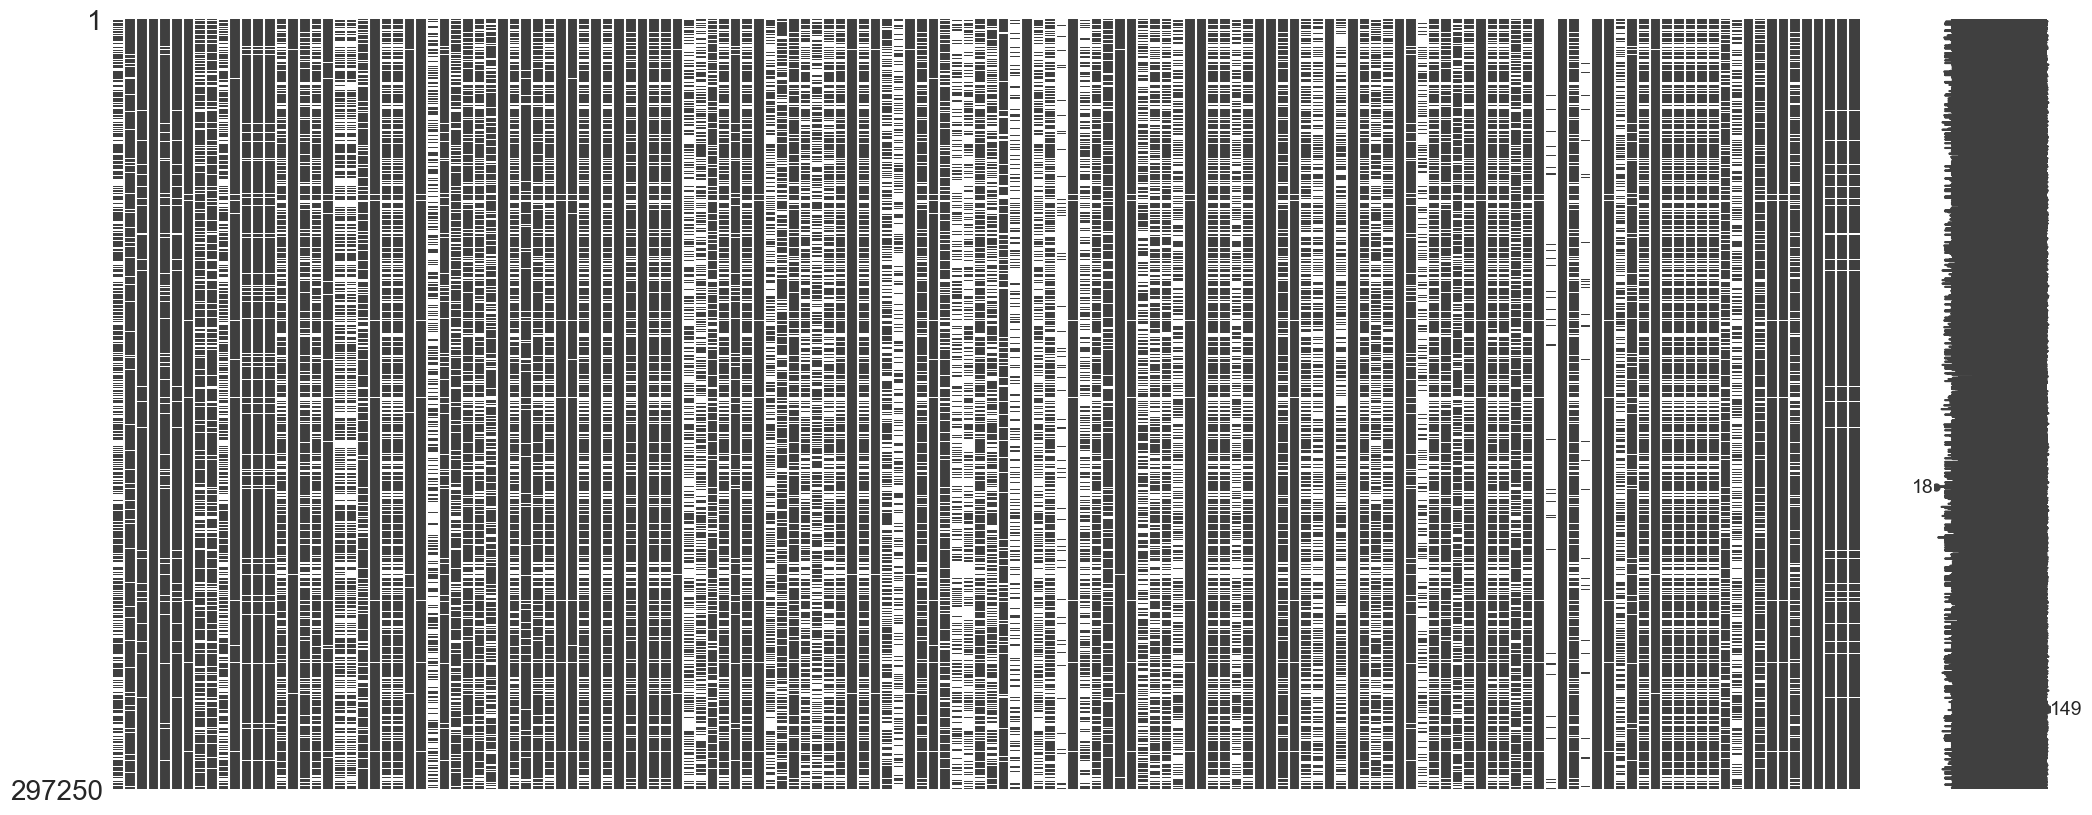

In [70]:
import missingno as msno
msno.matrix(X_train)
plt.show()


In [72]:
correlation_matrix = X_train.corr()
correlation_matrix


,application_1,cc_1,cc_3,feature_1,mb_1,cc_5,feature_2,cc_7,cc_8,application_2,...,application_15,feature_25,feature_26,cc_22,partner_24,application_16,treatment,cc_4_OrdinalEncoder,cc_2_OrdinalEncoder,cc_6_OrdinalEncoder
application_1,1.000000,NaN,-0.085946,-0.074087,-0.012511,0.045690,0.133267,0.001473,0.007822,0.339969,...,0.217071,-0.111691,0.012484,0.009987,-0.000694,0.188674,0.008458,-0.107882,-0.048283,0.008365
cc_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc_3,-0.085946,NaN,1.000000,0.637948,-0.055992,-0.018049,-0.306510,-0.234674,-0.243692,-0.225124,...,-0.249527,0.761293,-0.409335,-0.180229,0.060297,-0.240049,-0.015693,0.543210,0.600171,0.127347
feature_1,-0.074087,NaN,0.637948,1.000000,-0.049452,-0.007789,-0.255944,-0.199380,-0.199201,-0.188897,...,-0.200493,0.678552,-0.383830,-0.150677,0.054840,-0.193847,-0.017538,0.508940,0.563982,0.114666
mb_1,-0.012511,NaN,-0.055992,-0.049452,1.000000,0.086544,-0.059637,-0.038980,-0.042224,-0.062307,...,-0.026958,-0.043738,0.155343,0.112228,-0.049323,-0.025939,0.003921,-0.110130,-0.137592,-0.002819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
application_16,0.188674,NaN,-0.240049,-0.193847,-0.025939,0.052945,0.479471,-0.013177,0.060448,0.471702,...,0.856395,-0.315428,0.016797,0.029020,0.030935,1.000000,0.006024,-0.288120,-0.082565,0.008443
treatment,0.008458,NaN,-0.015693,-0.017538,0.003921,-0.000600,0.006894,0.005775,0.004577,0.007182,...,0.007295,-0.020564,0.012476,0.005513,0.001316,0.006024,1.000000,-0.013090,-0.013297,-0.004411
cc_4_OrdinalEncoder,-0.107882,NaN,0.543210,0.508940,-0.110130,-0.038312,-0.387245,-0.136609,-0.171078,-0.291606,...,-0.308369,0.538577,-0.383643,-0.125704,0.023048,-0.288120,-0.013090,1.000000,0.506727,0.126966
cc_2_OrdinalEncoder,-0.048283,NaN,0.600171,0.563982,-0.137592,-0.002467,-0.000991,-0.158750,-0.180654,-0.047142,...,-0.076857,0.605617,-0.514451,-0.198690,0.080696,-0.082565,-0.013297,0.506727,1.000000,0.045741


In [ ]:
X_train = X_train[X_train['successful_utilization'] > 1]

In [74]:
X = X_train

In [73]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [75]:
# Заполняем пропуски временно средними значениями для работы K-means
df_filled = X.fillna(X.mean())

# Стандартизация данных (нормализация)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_filled)

# Применяем KMeans с заданным числом кластеров (например, 3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Добавляем колонки с кластерами в DataFrame
X['Cluster'] = clusters

# Заполнение пропусков по кластерам
for column in X.columns[:-1]:  # Пропускаем столбец с кластерами
    for cluster in range(kmeans.n_clusters):
        # Вычисляем среднее значение признака в пределах кластера
        cluster_mean = X[X['Cluster'] == cluster][column].mean()
        
        # Заполняем пропуски средним значением кластера
        X.loc[(X[column].isnull()) & (X['Cluster'] == cluster), column] = cluster_mean

# Удаляем временный столбец с кластерами
X.drop(columns=['Cluster'], inplace=True)

/var/folders/85/nvry22pd6nx6pfd1c1h6z_nr0000gp/T/ipykernel_84074/288831978.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.16471183866340394' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[(X[column].isnull()) & (X['Cluster'] == cluster), column] = cluster_mean
/var/folders/85/nvry22pd6nx6pfd1c1h6z_nr0000gp/T/ipykernel_84074/288831978.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '86.79731668213653' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[(X[column].isnull()) & (X['Cluster'] == cluster), column] = cluster_mean
/var/folders/85/nvry22pd6nx6pfd1c1h6z_nr0000gp/T/ipykernel_84074/288831978.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas

In [76]:
X

,application_1,cc_1,cc_3,feature_1,mb_1,cc_5,feature_2,cc_7,cc_8,application_2,...,application_15,feature_25,feature_26,cc_22,partner_24,application_16,treatment,cc_4_OrdinalEncoder,cc_2_OrdinalEncoder,cc_6_OrdinalEncoder
0,2.397794,1.0,123.0,1.0,14.00000,147000.0,0.0,0.008663,0.008663,2.371477,...,0.0,1.000000,0.0,-1.2,1.000000,0.0,1.0,68.0,8.0,7.0
1,48.861725,1.0,43.0,0.0,1.00000,120000.0,0.0,0.022936,0.022936,4.706499,...,0.0,1.000000,0.0,-1.2,1.000000,0.0,1.0,1.0,5.0,7.0
2,0.000000,1.0,2.0,0.0,30.43861,15000.0,0.0,0.062026,0.060423,0.000000,...,0.0,0.160424,0.0,-1.2,1.000000,0.0,1.0,54.0,9.0,7.0
3,0.000000,1.0,2.0,0.0,91.00000,260000.0,0.0,0.062026,0.060423,0.000000,...,0.0,0.160424,1.0,-1.2,1.000000,0.0,1.0,20.0,2.0,7.0
4,0.000000,1.0,123.0,1.0,1.00000,130000.0,0.0,0.029764,0.029764,0.000000,...,0.0,1.000000,0.0,-1.2,1.000000,0.0,1.0,68.0,8.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297245,2.397794,1.0,123.0,1.0,34.00000,95000.0,0.0,0.086722,0.086722,2.371477,...,0.0,1.000000,0.0,-1.2,1.000000,0.0,1.0,68.0,8.0,7.0
297246,2.397794,1.0,123.0,1.0,1.00000,83000.0,0.0,0.025878,0.025878,2.371477,...,0.0,1.000000,0.0,-1.2,0.988519,0.0,1.0,68.0,8.0,7.0
297247,0.000000,1.0,2.0,0.0,2.00000,170000.0,0.0,0.029534,0.045196,0.000000,...,0.0,0.206521,0.0,1.0,1.000000,0.0,1.0,36.0,4.0,7.0
297248,0.000000,1.0,123.0,1.0,5.00000,15000.0,0.0,0.034553,0.034553,0.000000,...,0.0,1.000000,0.0,-1.2,1.000000,0.0,1.0,68.0,8.0,7.0


In [77]:
model.fit(X, y_train)

/Users/ssd/Documents/src/spb2024/allcup/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [89]:
x = X.drop('treatment', axis=1)

In [80]:
print(model.score(X, y_train))

0.7594684608915054


In [82]:
test

,application_1,cc_1,cc_2,cc_3,cc_4,feature_1,mb_1,cc_5,cc_6,feature_2,...,bki_46,feature_24,cc_21,application_15,feature_25,feature_26,cc_22,partner_24,application_16,retro_date
0,0.0,1.0,NaN,NaN,NaN,0,6.0,NaN,NaN,0.0,...,373942.00,0.0,1.0,0,0.0,0.0,-1.2,1.0,0,2024-06-18
1,0.0,1.0,NaN,NaN,NaN,0,45.0,NaN,NaN,0.0,...,0.00,0.0,0.0,0,0.0,1.0,-1.2,1.0,0,2024-05-09
2,0.0,1.0,MB,2.0,Heavy xsell,0,13.0,299000.0,PLT,0.0,...,9724333.00,NaN,NaN,0,NaN,0.0,-1.2,1.0,0,2024-05-30
3,0.0,1.0,Representatives,123.0,SIM,1,158.0,140000.0,PLT,0.0,...,0.00,0.0,NaN,0,1.0,0.0,-1.2,1.0,0,2024-05-27
4,0.0,1.0,Representatives,123.0,Первичная ДК,0,36.0,170000.0,PLT,0.0,...,2237284.00,0.0,0.0,0,1.0,0.0,-1.2,1.0,0,2024-06-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74308,NaN,1.0,Representatives,123.0,Multitask,1,NaN,15000.0,PLT,0.0,...,2834099.00,0.0,NaN,0,1.0,0.0,-1.2,1.0,0,2024-05-15
74309,0.0,1.0,Representatives,123.0,Первичная ДК,1,12.0,95000.0,PLT,0.0,...,145886.00,NaN,NaN,0,NaN,0.0,-1.2,1.0,0,2024-07-10
74310,0.0,NaN,PreApprove (Mobile Applicants),2.0,Other,0,5.0,15000.0,PLT,0.0,...,5896358.00,0.0,0.0,1,0.0,1.0,-1.2,1.0,1,2024-06-27
74311,0.0,1.0,Representatives,123.0,Перевыпуск ДК,1,52.0,70000.0,PLT,0.0,...,5339.00,0.0,NaN,0,1.0,0.0,-1.2,1.0,0,2024-06-10


In [97]:
ord_enc = OrdinalEncoder()
test["cc_4_OrdinalEncoder"] = ord_enc.fit_transform(test[["cc_4"]])
ord_enc = OrdinalEncoder()
test["cc_2_OrdinalEncoder"] = ord_enc.fit_transform(test[["cc_2"]])
ord_enc = OrdinalEncoder()
test["cc_6_OrdinalEncoder"] = ord_enc.fit_transform(test[["cc_6"]])

In [98]:
test.drop('retro_date', axis=1, inplace=True)

In [99]:
test.drop('cc_2', axis=1, inplace=True)
test.drop('cc_4', axis=1, inplace=True)
test.drop('cc_6', axis=1, inplace=True)

In [106]:
model.fit(X, y_train)

/Users/ssd/Documents/src/spb2024/allcup/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [102]:
y_pred_1 = model.predict_proba(test)

In [93]:
test.columns == x.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [94]:
test

,application_1,cc_1,cc_3,feature_1,mb_1,cc_5,feature_2,cc_7,cc_8,application_2,...,cc_21,application_15,feature_25,feature_26,cc_22,partner_24,application_16,cc_2_OrdinalEncoder,cc_4_OrdinalEncoder,cc_6_OrdinalEncoder
0,0.0,1.0,NaN,0,6.0,NaN,0.0,0.293391,NaN,0.0,...,1.0,0,0.0,0.0,-1.2,1.0,0,NaN,NaN,NaN
1,0.0,1.0,NaN,0,45.0,NaN,0.0,0.001504,NaN,0.0,...,0.0,0,0.0,1.0,-1.2,1.0,0,NaN,NaN,NaN
2,0.0,1.0,2.0,0,13.0,299000.0,0.0,0.025830,0.025830,0.0,...,NaN,0,NaN,0.0,-1.2,1.0,0,2.0,10.0,5.0
3,0.0,1.0,123.0,1,158.0,140000.0,0.0,0.004579,0.004579,0.0,...,NaN,0,1.0,0.0,-1.2,1.0,0,7.0,30.0,5.0
4,0.0,1.0,123.0,0,36.0,170000.0,0.0,0.034488,0.034488,0.0,...,0.0,0,1.0,0.0,-1.2,1.0,0,7.0,67.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74308,NaN,1.0,123.0,1,NaN,15000.0,0.0,0.007608,0.007608,NaN,...,NaN,0,1.0,0.0,-1.2,1.0,0,7.0,18.0,5.0
74309,0.0,1.0,123.0,1,12.0,95000.0,0.0,0.019465,0.019465,0.0,...,NaN,0,NaN,0.0,-1.2,1.0,0,7.0,67.0,5.0
74310,0.0,NaN,2.0,0,5.0,15000.0,0.0,NaN,0.186416,71.4,...,0.0,1,0.0,1.0,-1.2,1.0,1,6.0,20.0,5.0
74311,0.0,1.0,123.0,1,52.0,70000.0,0.0,0.001493,0.001493,0.0,...,NaN,0,1.0,0.0,-1.2,1.0,0,7.0,68.0,5.0


In [95]:
x

,application_1,cc_1,cc_3,feature_1,mb_1,cc_5,feature_2,cc_7,cc_8,application_2,...,cc_21,application_15,feature_25,feature_26,cc_22,partner_24,application_16,cc_4_OrdinalEncoder,cc_2_OrdinalEncoder,cc_6_OrdinalEncoder
0,2.397794,1.0,123.0,1.0,14.00000,147000.0,0.0,0.008663,0.008663,2.371477,...,0.837728,0.0,1.000000,0.0,-1.2,1.000000,0.0,68.0,8.0,7.0
1,48.861725,1.0,43.0,0.0,1.00000,120000.0,0.0,0.022936,0.022936,4.706499,...,1.000000,0.0,1.000000,0.0,-1.2,1.000000,0.0,1.0,5.0,7.0
2,0.000000,1.0,2.0,0.0,30.43861,15000.0,0.0,0.062026,0.060423,0.000000,...,0.504368,0.0,0.160424,0.0,-1.2,1.000000,0.0,54.0,9.0,7.0
3,0.000000,1.0,2.0,0.0,91.00000,260000.0,0.0,0.062026,0.060423,0.000000,...,1.000000,0.0,0.160424,1.0,-1.2,1.000000,0.0,20.0,2.0,7.0
4,0.000000,1.0,123.0,1.0,1.00000,130000.0,0.0,0.029764,0.029764,0.000000,...,0.837728,0.0,1.000000,0.0,-1.2,1.000000,0.0,68.0,8.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297245,2.397794,1.0,123.0,1.0,34.00000,95000.0,0.0,0.086722,0.086722,2.371477,...,0.837728,0.0,1.000000,0.0,-1.2,1.000000,0.0,68.0,8.0,7.0
297246,2.397794,1.0,123.0,1.0,1.00000,83000.0,0.0,0.025878,0.025878,2.371477,...,0.837728,0.0,1.000000,0.0,-1.2,0.988519,0.0,68.0,8.0,7.0
297247,0.000000,1.0,2.0,0.0,2.00000,170000.0,0.0,0.029534,0.045196,0.000000,...,1.000000,0.0,0.206521,0.0,1.0,1.000000,0.0,36.0,4.0,7.0
297248,0.000000,1.0,123.0,1.0,5.00000,15000.0,0.0,0.034553,0.034553,0.000000,...,0.000000,0.0,1.000000,0.0,-1.2,1.000000,0.0,68.0,8.0,7.0


In [101]:
# Заполняем пропуски временно средними значениями для работы K-means
df_filled = test.fillna(test.mean())

# Стандартизация данных (нормализация)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_filled)

# Применяем KMeans с заданным числом кластеров (например, 3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Добавляем колонки с кластерами в DataFrame
test['Cluster'] = clusters

# Заполнение пропусков по кластерам
for column in test.columns[:-1]:  # Пропускаем столбец с кластерами
    for cluster in range(kmeans.n_clusters):
        # Вычисляем среднее значение признака в пределах кластера
        cluster_mean = test[test['Cluster'] == cluster][column].mean()
        
        # Заполняем пропуски средним значением кластера
        test.loc[(test[column].isnull()) & (test['Cluster'] == cluster), column] = cluster_mean

# Удаляем временный столбец с кластерами
test.drop(columns=['Cluster'], inplace=True)

/var/folders/85/nvry22pd6nx6pfd1c1h6z_nr0000gp/T/ipykernel_84074/1719971307.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.05265125220270198' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  test.loc[(test[column].isnull()) & (test['Cluster'] == cluster), column] = cluster_mean
/var/folders/85/nvry22pd6nx6pfd1c1h6z_nr0000gp/T/ipykernel_84074/1719971307.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '602.9572275324398' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  test.loc[(test[column].isnull()) & (test['Cluster'] == cluster), column] = cluster_mean
/var/folders/85/nvry22pd6nx6pfd1c1h6z_nr0000gp/T/ipykernel_84074/1719971307.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a fut

In [103]:
y_pred_1

array([[0.54904108, 0.45095892],
       [0.78278578, 0.21721422],
       [0.95814574, 0.04185426],
       ...,
       [0.66851576, 0.33148424],
       [0.56418257, 0.43581743],
       [0.85272203, 0.14727797]])

In [104]:
X_test_0 = X.copy()
X_test_0['treatment'] = 0

In [110]:
y_pred_0 = model.predict_proba(X_test_0)[:,1]

In [111]:
X_test_1 = X.copy()
X_test_1['treatment'] = 1
y_pred_1 = model.predict_proba(X_test_1)[:,1]

In [112]:
y_pred_1

array([0.1350821 , 0.41756601, 0.30842875, ..., 0.26080441, 0.12424308,
       0.45475811])

In [113]:
uplift = y_pred_1 - y_pred_0

In [115]:
uplift_pd = pd.DataFrame(data = uplift, index = X.index, columns=['uplift'])
uplift_pd = uplift_pd.sort_values(by='uplift', ascending=False)

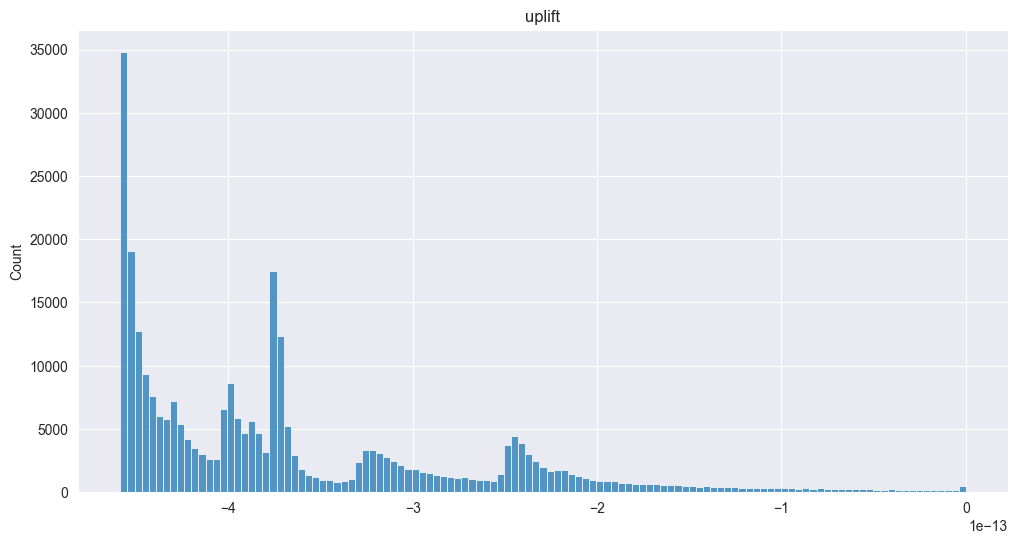

In [116]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data = uplift_pd, x=uplift).set_title('uplift')
plt.show()

In [117]:
uplift

array([-2.14300799e-13, -4.46143122e-13, -3.91298105e-13, ...,
       -3.53661544e-13, -1.99618100e-13, -4.54913884e-13])

In [129]:
CsvUplift = pd.DataFrame({'successful_utilization' : uplift})

In [130]:
CsvUplift.to_csv('/Users/ssd/Downloads/uplift3.csv')

In [120]:
CsvUplift

,uplift
0,-2.143008e-13
1,-4.461431e-13
2,-3.912981e-13
3,-1.696143e-13
4,-2.365053e-13
...,...
297245,-4.407585e-13
297246,-2.923217e-13
297247,-3.536615e-13
297248,-1.996181e-13


In [126]:
CsvUplift2 = pd.concat([X_test, CsvUplift])

In [124]:
X_test = pd.read_csv('test.csv')

In [128]:
CsvUplift2

,application_1,cc_1,cc_2,cc_3,cc_4,feature_1,mb_1,cc_5,cc_6,feature_2,...,feature_24,cc_21,application_15,feature_25,feature_26,cc_22,partner_24,application_16,retro_date,uplift
0,0.0,1.0,NaN,NaN,NaN,0.0,6.0,NaN,NaN,0.0,...,0.0,1.0,0.0,0.0,0.0,-1.2,1.0,0.0,2024-06-18,NaN
1,0.0,1.0,NaN,NaN,NaN,0.0,45.0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,1.0,-1.2,1.0,0.0,2024-05-09,NaN
2,0.0,1.0,MB,2.0,Heavy xsell,0.0,13.0,299000.0,PLT,0.0,...,NaN,NaN,0.0,NaN,0.0,-1.2,1.0,0.0,2024-05-30,NaN
3,0.0,1.0,Representatives,123.0,SIM,1.0,158.0,140000.0,PLT,0.0,...,0.0,NaN,0.0,1.0,0.0,-1.2,1.0,0.0,2024-05-27,NaN
4,0.0,1.0,Representatives,123.0,Первичная ДК,0.0,36.0,170000.0,PLT,0.0,...,0.0,0.0,0.0,1.0,0.0,-1.2,1.0,0.0,2024-06-08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.407585e-13
297246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.923217e-13
297247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.536615e-13
297248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.996181e-13


In [131]:
CsvUplift

,successful_utilization
0,-2.143008e-13
1,-4.461431e-13
2,-3.912981e-13
3,-1.696143e-13
4,-2.365053e-13
...,...
297245,-4.407585e-13
297246,-2.923217e-13
297247,-3.536615e-13
297248,-1.996181e-13
